# Fit with Orthogonal distance regression

Example from http://stackoverflow.com/questions/26058792/correct-fitting-with-scipy-curve-fit-including-errors-in-x/26085136#26085136

In [1]:
# manage data and fit
import pandas as pd
import numpy as np

# scipy ODR : orthogonal distance regression
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

## generate data

In [38]:
npts = 100
x = np.linspace(-3, 2, npts)
y = func([-2.3, 7.0, -4.0], x)

sigma_x = .3
sigma_y = 2

# add some noise
x += np.random.normal(scale=sigma_x, size=100)
y += np.random.normal(scale=sigma_y, size=100)

## Define model

In [39]:
data = RealData(x, y, 0.3, 0.1)
model = Model(func)
odr = ODR(data, model, [1,0,0])

## Least squarre fit

In [40]:
odr.set_job(fit_type=0)
lsq_output = odr.run()
print("   stop reason:", lsq_output.stopreason)
print("        params:", lsq_output.beta)
print("          info:", lsq_output.info)
print("       sd_beta:", lsq_output.sd_beta)
print("sqrt(diag(cov):", np.sqrt(np.diag(lsq_output.cov_beta)))
if lsq_output.info != 1:
    print("\nRestart ODR till convergence is reached")
    i = 1
    while lsq_output.info != 1 and i < 100:
        print("restart", i)
        lsq_output = odr.restart()
        i += 1
    print("   stop reason:", lsq_output.stopreason)
    print("        params:", lsq_output.beta)
    print("          info:", lsq_output.info)
    print("       sd_beta:", lsq_output.sd_beta)
    print("sqrt(diag(cov):", np.sqrt(np.diag(lsq_output.cov_beta)))

   stop reason: ['Iteration limit reached']
        params: [-1.73144982  3.43753604 -2.31954451]
          info: 4
       sd_beta: [ 0.32819391  1.01215318  1.80529069]
sqrt(diag(cov): [ 0.02256626  0.06959458  0.12412987]

Restart ODR till convergence is reached
restart 1
restart 2
restart 3
restart 4
restart 5
restart 6
restart 7
restart 8
restart 9
restart 10
restart 11
restart 12
restart 13
restart 14
restart 15
restart 16
restart 17
restart 18
restart 19
restart 20
restart 21
restart 22
restart 23
restart 24
restart 25
restart 26
restart 27
restart 28
restart 29
restart 30
restart 31
restart 32
restart 33
restart 34
restart 35
restart 36
restart 37
restart 38
restart 39
restart 40
restart 41
restart 42
restart 43
restart 44
restart 45
restart 46
restart 47
restart 48
restart 49
restart 50
restart 51
restart 52
restart 53
restart 54
restart 55
restart 56
restart 57
restart 58
restart 59
restart 60
restart 61
restart 62
restart 63
restart 64
restart 65
restart 66
restart 67
restart

In [41]:
lsq_output.pprint()

Beta: [-1.79559282  9.35435362 -2.91152783]
Beta Std Error: [ 0.18431723  0.41428826  0.3268186 ]
Beta Covariance: [[ 0.00640161 -0.00066291  0.00074793]
 [-0.00066291  0.03234169 -0.02301626]
 [ 0.00074793 -0.02301626  0.02012663]]
Residual Variance: 5.306920024122882
Inverse Condition #: 0.030501851722070105
Reason(s) for Halting:
  Iteration limit reached


## ODR fit

In [42]:
odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
odr_output = odr.run()
print("   stop reason:", odr_output.stopreason)
print("        params:", odr_output.beta)
print("          info:", odr_output.info)
print("       sd_beta:", odr_output.sd_beta)
print("sqrt(diag(cov):", np.sqrt(np.diag(odr_output.cov_beta)))
if odr_output.info != 1:
    print("\nRestart ODR till convergence is reached")
    i = 1
    while odr_output.info != 1 and i < 100:
        print("restart", i)
        odr_output = odr.restart()
        i += 1
    print("   stop reason:", odr_output.stopreason)
    print("        params:", odr_output.beta)
    print("          info:", odr_output.info)
    print("       sd_beta:", odr_output.sd_beta)
    print("sqrt(diag(cov):", np.sqrt(np.diag(odr_output.cov_beta)))

   stop reason: ['Sum of squares convergence']
        params: [-0.29342775  2.23199433 -2.71725414]
          info: 1
       sd_beta: [ 0.89783414  1.04615002  0.17658797]
sqrt(diag(cov): [ 0.01069308  0.0124595   0.00210314]


## Plot

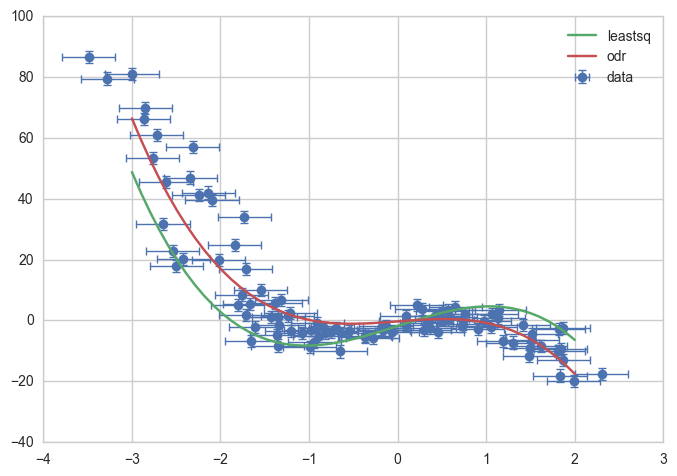

In [43]:
xn = np.linspace(-3, 2, 50)

plt.errorbar(x, y, marker="o", linestyle="", label="data", xerr=sigma_x, yerr=sigma_y, elinewidth=1, capthick=1)
plt.plot(xn, func(lsq_output.beta, xn), label='leastsq')
plt.plot(xn, func(odr_output.beta, xn), label='odr')
plt.legend()